# Oasis Infobytes
## Data Science Internship
## Author : Aparnna S
### Task 4: Email spam detection with Machine Learning

In [26]:
# Importing Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing Dataset

data= pd.read_csv("C:/Users/aparn/Desktop/Oasis Infobytes/spam.csv",encoding=('ISO-8859-1'))
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.duplicated().sum()

403

In [13]:
data.drop_duplicates(inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
# Renaming columns

data.rename(columns={'v1':'Target','v2':'Message'},inplace=True)
data

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
data.dtypes

Target     object
Message    object
dtype: object

In [21]:
# Encoding Target column

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Target']=encoder.fit_transform(data['Target'])
data['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [22]:
data.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Target', ylabel='count'>

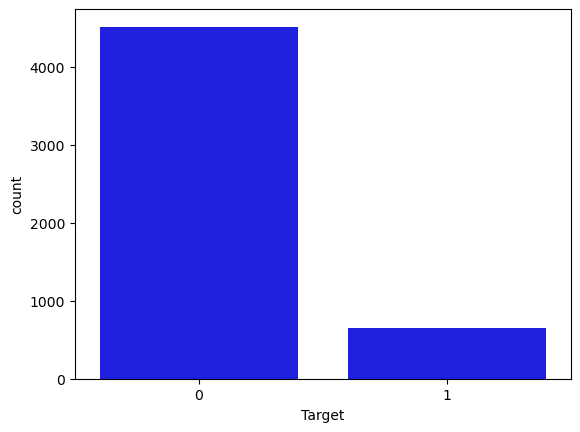

In [27]:
# Visualization

sns.countplot(x='Target',data=data,color='blue')

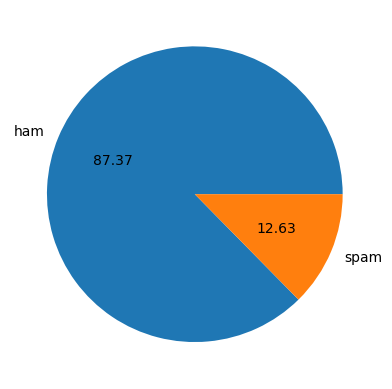

In [28]:
# pie chart

plt.pie(data['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [29]:
# Data modelling

x=data['Message']
y=data['Target']


In [30]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [31]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Target, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [33]:
# Converting string into integer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


In [34]:
cv=CountVectorizer()

In [35]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)
print(x_train_cv)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [38]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train_cv, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = model.predict(x_test_cv)

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9729206963249516


In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[894   0]
 [ 28 112]]


In [42]:
# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       894
           1       1.00      0.80      0.89       140

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



#### Conclusion

Email spam classification has received a tremendous attention by majority of the people as it helps to identify the unwanted information and threats. After testing the system Different performance measures such as the precision, recall, & the accuracy etc. were observed. It achieves 97% average accuracy by Random Forests (RF) Technique.